In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('datasets/covid_2020_2022.csv')
df.head(10)

,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",State Code,Region,estimate base,2020,2021,2022
0,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,All Ages,21520.0,231602.0,17619.0,7411.0,356.0,32038.0,AL,South,5025369,5033094,5049196.0,5076181.0
1,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,Under 1 year,NaN,1491.0,19.0,NaN,NaN,24.0,AL,South,5025369,5033094,5049196.0,5076181.0
2,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,0-17 years,19.0,2691.0,45.0,NaN,NaN,67.0,AL,South,5025369,5033094,5049196.0,5076181.0
3,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,1-4 years,NaN,344.0,13.0,NaN,NaN,19.0,AL,South,5025369,5033094,5049196.0,5076181.0
4,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,5-14 years,NaN,453.0,11.0,NaN,NaN,16.0,AL,South,5025369,5033094,5049196.0,5076181.0
5,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,15-24 years,46.0,2672.0,51.0,16.0,NaN,85.0,AL,South,5025369,5033094,5049196.0,5076181.0
6,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,18-29 years,142.0,4549.0,122.0,55.0,NaN,214.0,AL,South,5025369,5033094,5049196.0,5076181.0
7,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,25-34 years,267.0,5388.0,218.0,102.0,NaN,389.0,AL,South,5025369,5033094,5049196.0,5076181.0
8,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,30-39 years,416.0,6827.0,319.0,147.0,13.0,599.0,AL,South,5025369,5033094,5049196.0,5076181.0
9,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,35-44 years,670.0,8639.0,468.0,231.0,16.0,921.0,AL,South,5025369,5033094,5049196.0,5076181.0


In [4]:
df['Year'] = df['Year'].fillna(0).astype(int)
df['Month'] = df['Month'].fillna(0).astype(int)
# Verify the conversion
print(df['Year'].dtypes)

int32


In [5]:
def match_population(row):
    year = int(row['Year'])
    if year in [2020, 2021, 2022]:
        return row[str(year)]
    else:
        return np.nan  # If year is not in our population columns

# Apply the function to create a new 'Population' column
pattern1 = df['Age Group'].str.contains('All Ages|Under 1 year|1-4 years|5-14 years|15-24 years|25-34 years|35-44 years|45-54 years|55-64 years|65-74 years|75-84 years|85 years and over')
df = df[pattern1]
df['Population'] = df.apply(match_population, axis=1)
df.drop(columns=['2020', '2021', '2022'], inplace=True)
df

,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",State Code,Region,estimate base,Population
0,01/01/2020,09/23/2023,By Total,0,0,Alabama,All Sexes,All Ages,21520.0,231602.0,17619.0,7411.0,356.0,32038.0,AL,South,5025369,NaN
1,01/01/2020,09/23/2023,By Total,0,0,Alabama,All Sexes,Under 1 year,NaN,1491.0,19.0,NaN,NaN,24.0,AL,South,5025369,NaN
3,01/01/2020,09/23/2023,By Total,0,0,Alabama,All Sexes,1-4 years,NaN,344.0,13.0,NaN,NaN,19.0,AL,South,5025369,NaN
4,01/01/2020,09/23/2023,By Total,0,0,Alabama,All Sexes,5-14 years,NaN,453.0,11.0,NaN,NaN,16.0,AL,South,5025369,NaN
5,01/01/2020,09/23/2023,By Total,0,0,Alabama,All Sexes,15-24 years,46.0,2672.0,51.0,16.0,NaN,85.0,AL,South,5025369,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104034,12/01/2022,12/31/2022,By Month,2022,12,Wyoming,Female,45-54 years,0.0,11.0,NaN,0.0,0.0,NaN,WY,West,576844,581978.0
104036,12/01/2022,12/31/2022,By Month,2022,12,Wyoming,Female,55-64 years,NaN,25.0,NaN,NaN,0.0,NaN,WY,West,576844,581978.0
104037,12/01/2022,12/31/2022,By Month,2022,12,Wyoming,Female,65-74 years,NaN,35.0,NaN,NaN,NaN,NaN,WY,West,576844,581978.0
104038,12/01/2022,12/31/2022,By Month,2022,12,Wyoming,Female,75-84 years,NaN,48.0,NaN,NaN,NaN,NaN,WY,West,576844,581978.0


In [6]:
age_group_order = ['All Ages',
    'Under 1 year', 
    '1-4 years', 
    '5-14 years', 
    '15-24 years', 
    '25-34 years', 
    '35-44 years', 
    '45-54 years', 
    '55-64 years', 
    '65-74 years', 
    '75-84 years', 
    '85 years and over'
]

In [7]:
df['Age Group'] = pd.Categorical(
    df['Age Group'], 
    categories=age_group_order, 
    ordered=True
)

# Sort the dataframe based on the categorical column


In [9]:
df_allSex_allAges = df[(df['Sex'] == 'All Sexes') & (df['Age Group'] == 'All Ages') & (df['Group'] == 'By Year')]
df_allSex_allAges

,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",State Code,Region,estimate base,Population
2601,01/01/2020,12/31/2020,By Year,2020,0,Alabama,All Sexes,All Ages,6706.0,63362.0,5213.0,2177.0,140.0,9870.0,AL,South,5025369,5033094.0
2652,01/01/2021,12/31/2021,By Year,2021,0,Alabama,All Sexes,All Ages,9719.0,67323.0,6356.0,3604.0,36.0,12496.0,AL,South,5025369,5049196.0
2703,01/01/2022,12/31/2022,By Year,2022,0,Alabama,All Sexes,All Ages,4226.0,61127.0,3935.0,1349.0,132.0,6931.0,AL,South,5025369,5076181.0
2754,01/01/2020,12/31/2020,By Year,2020,0,Alaska,All Sexes,All Ages,254.0,5008.0,312.0,142.0,10.0,434.0,AK,West,733395,733017.0
2805,01/01/2021,12/31/2021,By Year,2021,0,Alaska,All Sexes,All Ages,839.0,6075.0,667.0,502.0,NaN,1005.0,AK,West,733395,734420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10149,01/01/2021,12/31/2021,By Year,2021,0,Wisconsin,All Sexes,All Ages,6076.0,60807.0,4675.0,2472.0,13.0,8287.0,WI,Midwest,5894170,5881608.0
10200,01/01/2022,12/31/2022,By Year,2022,0,Wisconsin,All Sexes,All Ages,3912.0,60282.0,3569.0,1310.0,153.0,6310.0,WI,Midwest,5894170,5903975.0
10251,01/01/2020,12/31/2020,By Year,2020,0,Wyoming,All Sexes,All Ages,461.0,5527.0,475.0,198.0,10.0,748.0,WY,West,576844,577681.0
10302,01/01/2021,12/31/2021,By Year,2021,0,Wyoming,All Sexes,All Ages,963.0,5962.0,808.0,582.0,NaN,1191.0,WY,West,576844,579636.0


In [10]:
death_rate = (
    df_allSex_allAges.groupby(['State', 'Year'])['Total Deaths'].sum() /
    df_allSex_allAges.groupby(['State', 'Year'])['Population'].sum()
) * 100

death_rate = death_rate.reset_index(name='Death Rate (%)')



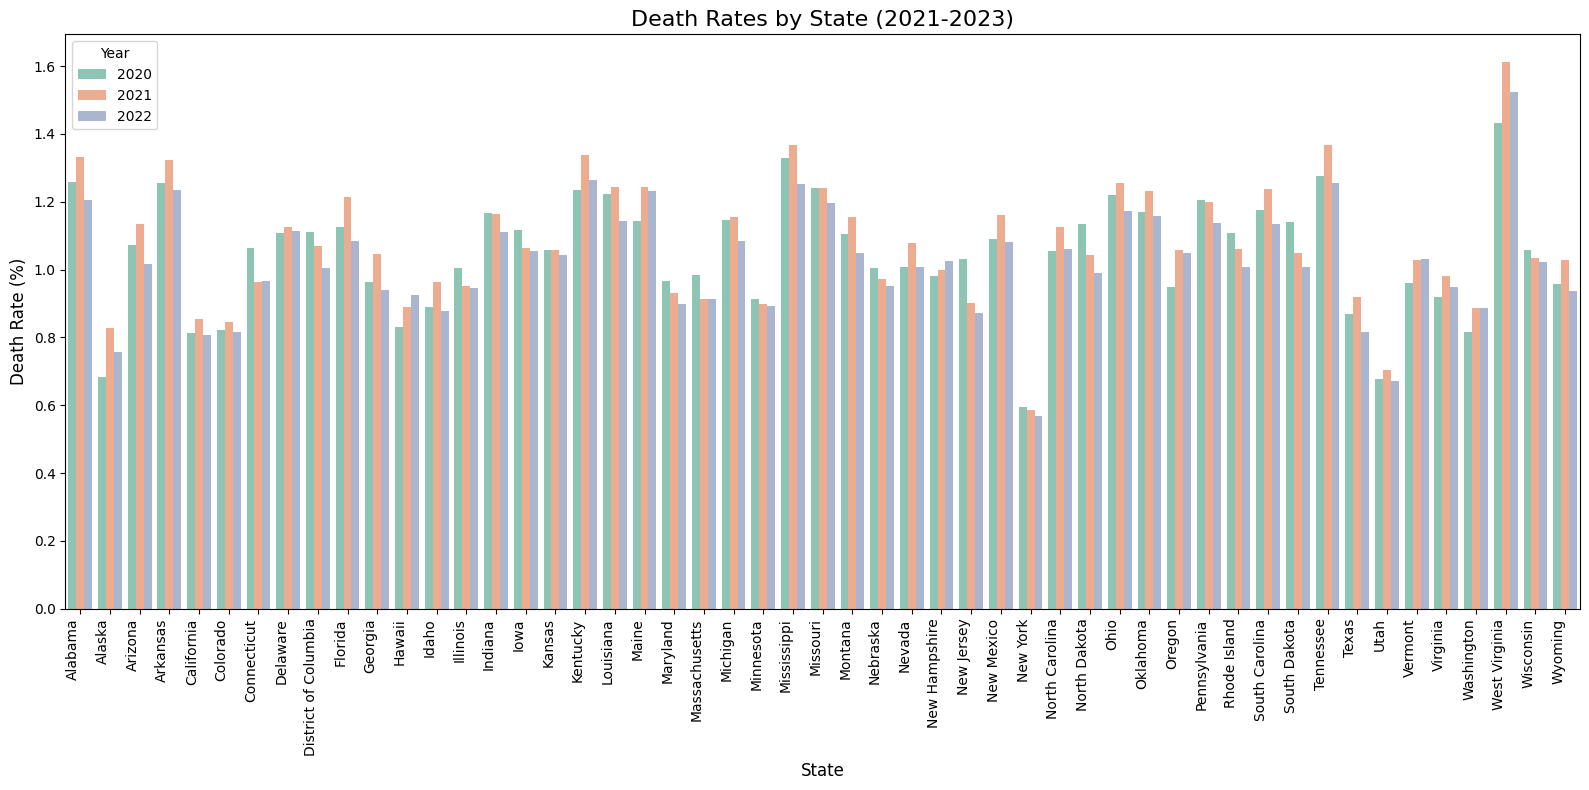

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(16, 8))

# Create a grouped bar chart for Death Rate (%) by State and Year
sns.barplot(
    data=death_rate,
    x='State',
    y='Death Rate (%)',
    hue='Year',
    palette='Set2',
    alpha=0.8,
    errorbar=None
)

# Customize the plot
plt.title('Death Rates by State (2021-2023)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Death Rate (%)', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Year', loc='upper left')

# Adjust layout to prevent cutting off elements
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
death_rate = (
    df_allSex_allAges.groupby(['State', 'Year'])['COVID-19 Deaths'].sum() /
    df_allSex_allAges.groupby(['State', 'Year'])['Population'].sum()
) * 100

death_rate = death_rate.reset_index(name='Death Rate (%)')
print('COVID-19 Deaths')
print(death_rate)

COVID-19 Deaths
         State  Year  Death Rate (%)
0      Alabama  2020        0.133238
1      Alabama  2021        0.192486
2      Alabama  2022        0.083252
3       Alaska  2020        0.034651
4       Alaska  2021        0.114240
..         ...   ...             ...
148  Wisconsin  2021        0.103305
149  Wisconsin  2022        0.066260
150    Wyoming  2020        0.079802
151    Wyoming  2021        0.166139
152    Wyoming  2022        0.060655

[153 rows x 3 columns]


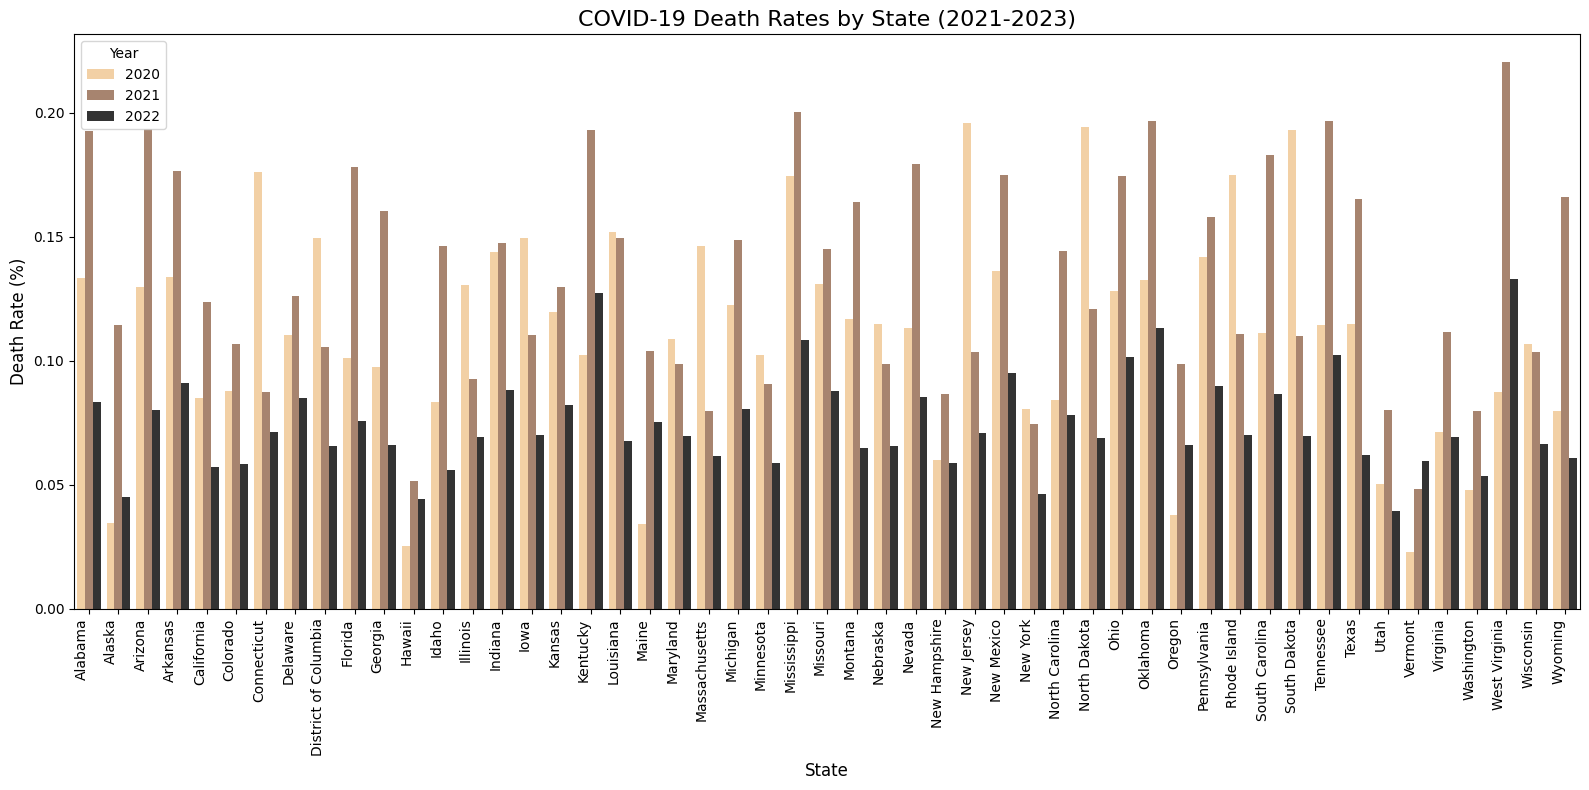

In [13]:
plt.figure(figsize=(16, 8))

# Create a grouped bar chart for Death Rate (%) by State and Year
sns.barplot(
    data=death_rate,
    x='State',
    y='Death Rate (%)',
    hue='Year',
    palette='copper_r',
    alpha=0.8,
    errorbar=None
)

# Customize the plot
plt.title('COVID-19 Death Rates by State (2021-2023)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Death Rate (%)', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Year', loc='upper left')

# Adjust layout to prevent cutting off elements
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
df_allAges = df[(df['Sex'] != 'All Sexes') & (df['Age Group'] == 'All Ages') & (df['Group'] == 'By Year')]

In [15]:
death_rate = (
    df_allAges.groupby(['State', 'Year','Sex'])['Total Deaths'].sum() /
    df_allAges.groupby(['State', 'Year','Sex'])['Population'].sum()
) * 100

death_rate = death_rate.reset_index(name='Death Rate (%)')
print('Total Deaths')
print(death_rate)

Total Deaths
       State  Year     Sex  Death Rate (%)
0    Alabama  2020  Female        0.603108
1    Alabama  2020    Male        0.655799
2    Alabama  2021  Female        0.631427
3    Alabama  2021    Male        0.701914
4    Alabama  2022  Female        0.575827
..       ...   ...     ...             ...
301  Wyoming  2020    Male        0.521568
302  Wyoming  2021  Female        0.469433
303  Wyoming  2021    Male        0.559144
304  Wyoming  2022  Female        0.429913
305  Wyoming  2022    Male        0.507407

[306 rows x 4 columns]


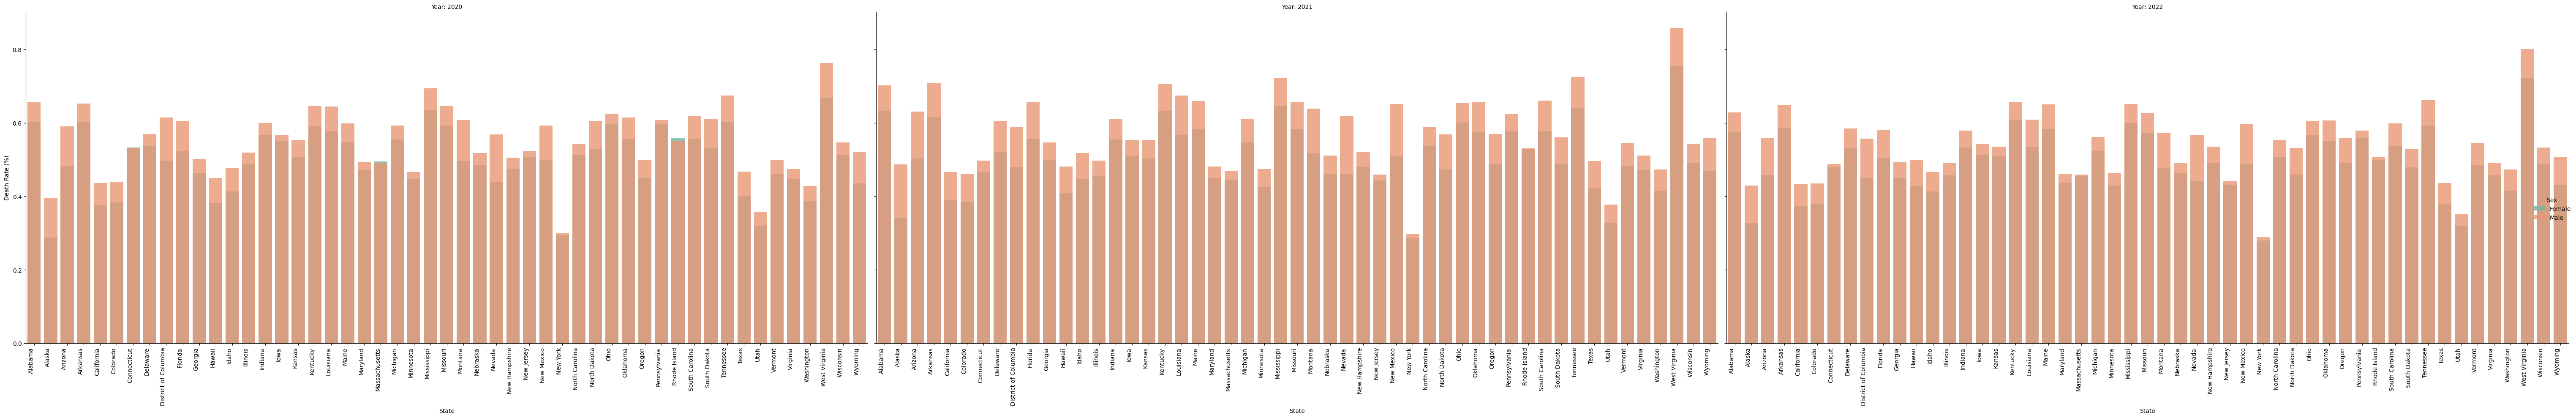

In [16]:

g = sns.FacetGrid(
    data=death_rate,
    col="Year",
    hue="Sex",
    height=10,  # Increase height for larger plots
    aspect=2,  # Increase aspect ratio for wider plots
    palette="Set2"
)

# Create a bar plot for each year with separated bars for each Sex
g.map(
    sns.barplot,
    "State",
    "Death Rate (%)",
    alpha=0.8,
    dodge=True,  # Separate the bars for each Sex
    order=death_rate['State'].unique()
)

# Customize the plot
g.set_titles("Year: {col_name}")
g.set_axis_labels("State", "Death Rate (%)")
g.set_xticklabels(rotation=90, ha='right')
g.add_legend(title="Sex")

# Adjust layout to prevent cutting off elements
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
death_rate = (
    df_allAges.groupby(['State', 'Year','Sex'])['COVID-19 Deaths'].sum() /
    df_allAges.groupby(['State', 'Year','Sex'])['Population'].sum()
) * 100

death_rate = death_rate.reset_index(name='Death Rate (%)')
print('Total Deaths')
print(death_rate)

Total Deaths
       State  Year     Sex  Death Rate (%)
0    Alabama  2020  Female        0.062467
1    Alabama  2020    Male        0.070772
2    Alabama  2021  Female        0.088984
3    Alabama  2021    Male        0.103502
4    Alabama  2022  Female        0.037706
..       ...   ...     ...             ...
301  Wyoming  2020    Male        0.040507
302  Wyoming  2021  Female        0.072114
303  Wyoming  2021    Male        0.094025
304  Wyoming  2022  Female        0.028867
305  Wyoming  2022    Male        0.031788

[306 rows x 4 columns]


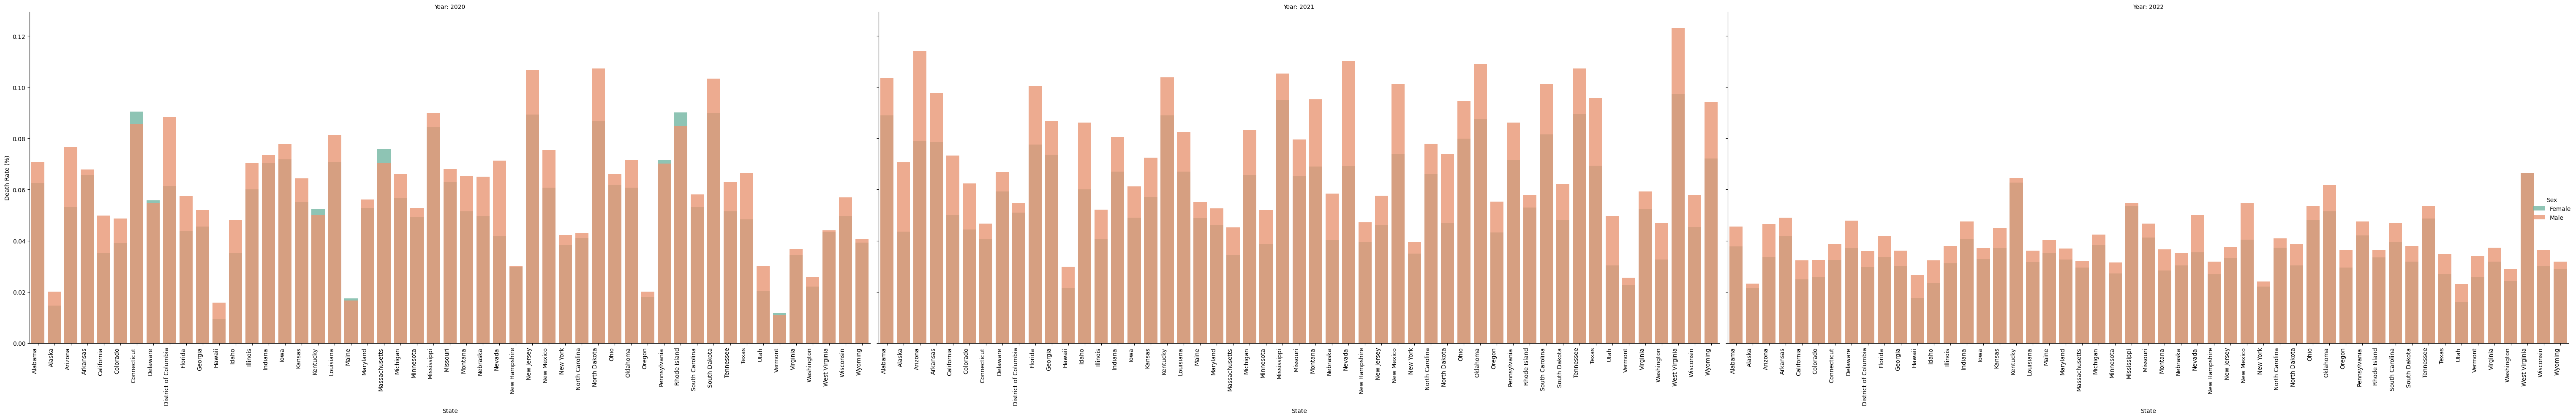

In [18]:

g = sns.FacetGrid(
    data=death_rate,
    col="Year",
    hue="Sex",
    height=10,  # Increase height for larger plots
    aspect=2,  # Increase aspect ratio for wider plots
    palette="Set2"
)

# Create a bar plot for each year with separated bars for each Sex
g.map(
    sns.barplot,
    "State",
    "Death Rate (%)",
    alpha=0.8,
    dodge=True,  # Separate the bars for each Sex
    order=death_rate['State'].unique()
)

# Customize the plot
g.set_titles("Year: {col_name}")
g.set_axis_labels("State", "Death Rate (%)")
g.set_xticklabels(rotation=90, ha='right')
g.add_legend(title="Sex")

# Adjust layout to prevent cutting off elements
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
df_allSex = df[(df['Sex'] == 'All Sexes') & (df['Age Group'] != 'All Ages') & (df['Group'] == 'By Year')]

In [20]:
death_rate = (
    df_allSex.groupby(['State', 'Year','Age Group'],observed=False)['Total Deaths'].sum() /
    df_allSex.groupby(['State', 'Year','Age Group'],observed=False)['Population'].sum()
) * 100

death_rate = death_rate.reset_index(name='Death Rate (%)')
print('Total Deaths')
print(death_rate)

Total Deaths
        State  Year          Age Group  Death Rate (%)
0     Alabama  2020           All Ages             NaN
1     Alabama  2020       Under 1 year        0.008007
2     Alabama  2020          1-4 years        0.001748
3     Alabama  2020         5-14 years        0.002046
4     Alabama  2020        15-24 years        0.014623
...       ...   ...                ...             ...
1831  Wyoming  2022        45-54 years        0.047940
1832  Wyoming  2022        55-64 years        0.122513
1833  Wyoming  2022        65-74 years        0.201210
1834  Wyoming  2022        75-84 years        0.240043
1835  Wyoming  2022  85 years and over        0.254821

[1836 rows x 4 columns]


In [ ]:

g = sns.FacetGrid(death_rate, col="State", col_wrap=4) # col_wrap to control columns in the grid

g.map(sns.lineplot, "Year", "Death Rate (%)", "Age Group")

g.add_legend()
g.set_axis_labels("Year", "Death Rate (%)")
g.set_titles(col_template="{col_name}") # State name as title for each facet
plt.suptitle("Death Rate (%) by State, Year, and Age Group", y=1.02) # Overall title

plt.tight_layout()

plt.show()

In [ ]:
death_rate = (
    df_allSex.groupby(['State', 'Year','Age Group'],observed=False)['COVID-19 Deaths'].sum() /
    df_allSex.groupby(['State', 'Year','Age Group'],observed=False)['Population'].sum()
) * 100

death_rate = death_rate.reset_index(name='Death Rate (%)')
print('Total Deaths')
print(death_rate)

Total Deaths
        State  Year          Age Group  Death Rate (%)
0     Alabama  2020           All Ages             NaN
1     Alabama  2020       Under 1 year        0.000000
2     Alabama  2020          1-4 years        0.000000
3     Alabama  2020         5-14 years        0.000000
4     Alabama  2020        15-24 years        0.000000
...       ...   ...                ...             ...
1831  Wyoming  2022        45-54 years        0.002749
1832  Wyoming  2022        55-64 years        0.006701
1833  Wyoming  2022        65-74 years        0.012028
1834  Wyoming  2022        75-84 years        0.018901
1835  Wyoming  2022  85 years and over        0.018729

[1836 rows x 4 columns]


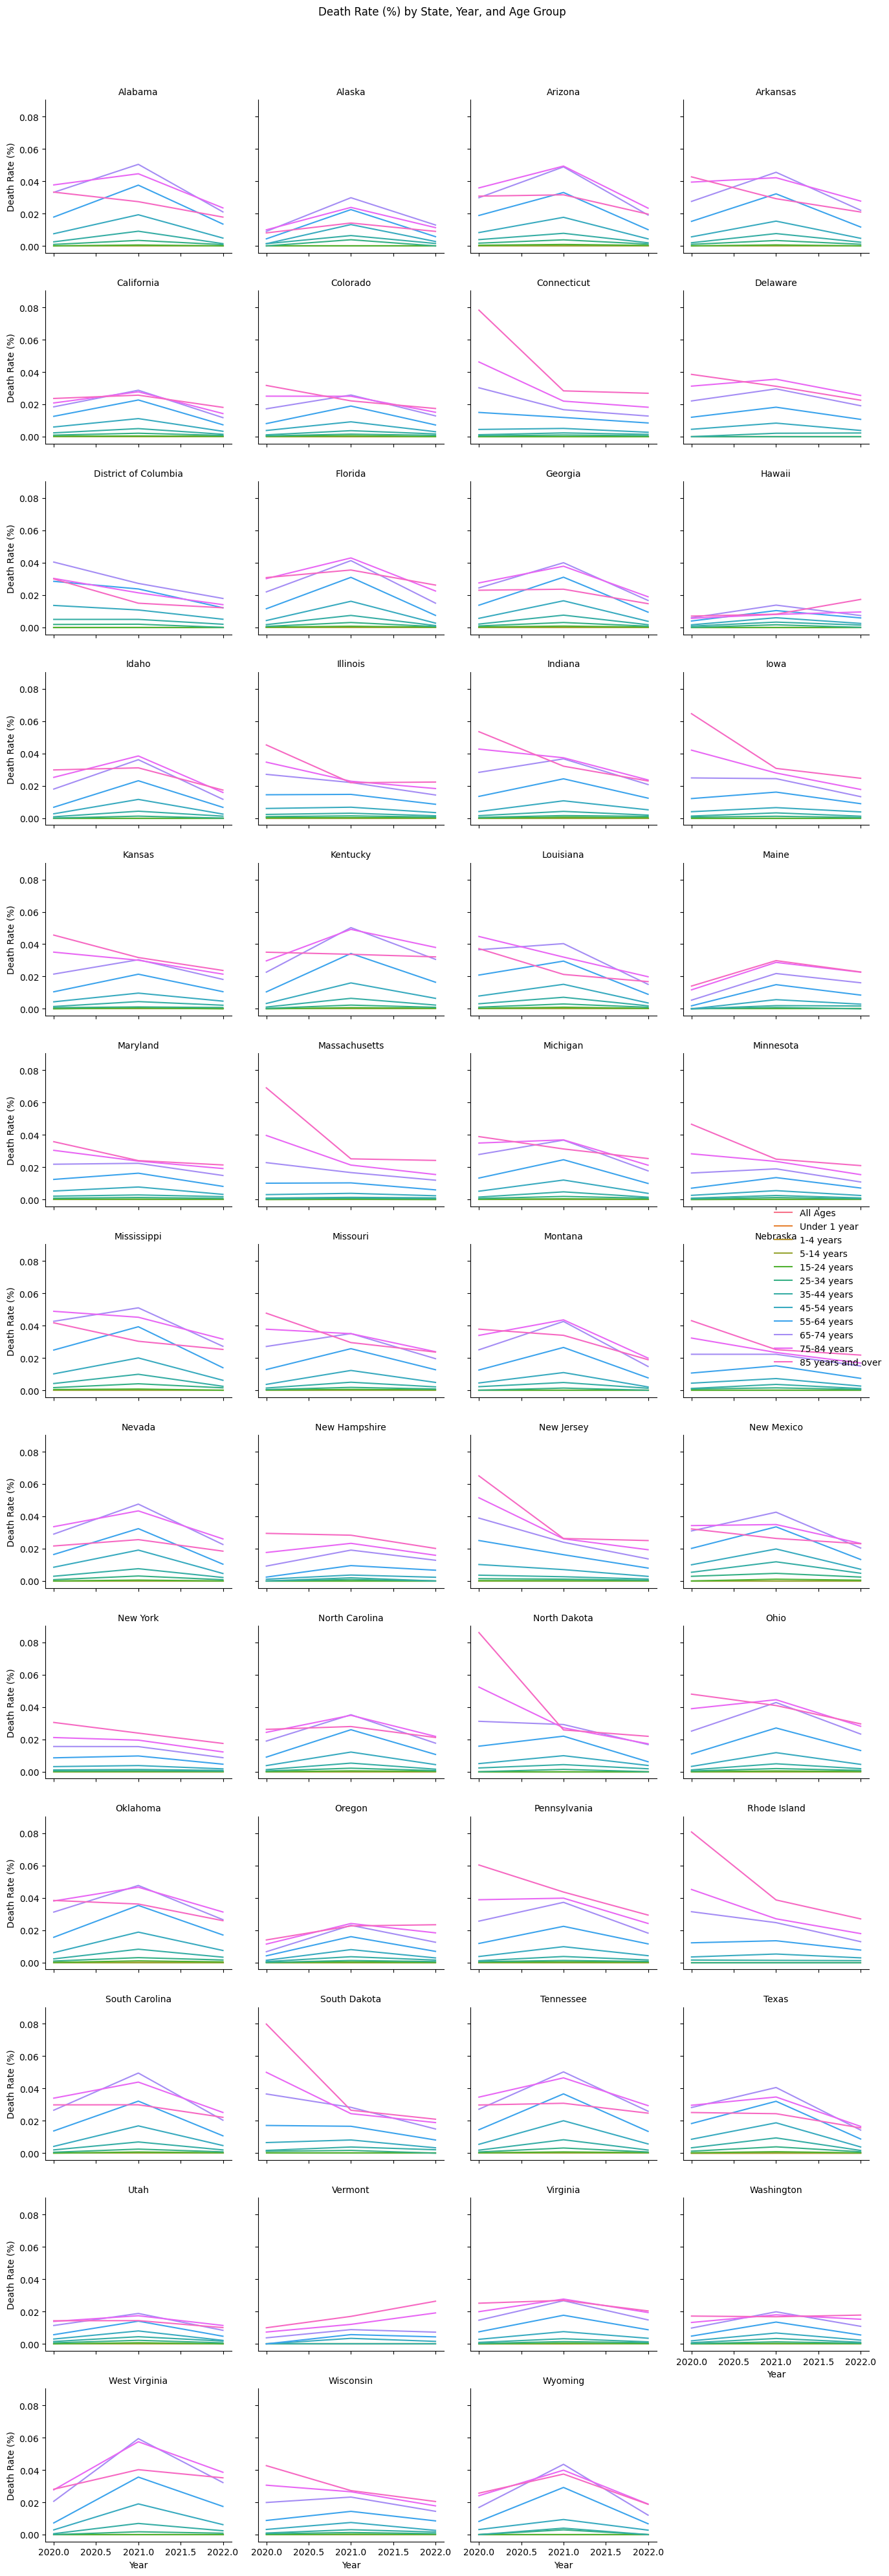

In [ ]:

g = sns.FacetGrid(death_rate, col="State", col_wrap=4) # col_wrap to control columns in the grid

g.map(sns.lineplot, "Year", "Death Rate (%)", "Age Group")

g.add_legend()
g.set_axis_labels("Year", "Death Rate (%)")
g.set_titles(col_template="{col_name}") # State name as title for each facet
plt.suptitle("Death Rate (%) by State, Year, and Age Group", y=1.02) # Overall title

plt.tight_layout()

plt.show()